## Data Cleaning (Worked Example)

Working with datasets, in real life, can be quite difficult. A common scenario being is our dataset is not error-free. There is a high possibility the datasets will have "bad values/empty values" that needs correction. In this worked example, we discuss some of the techniques that are used in data cleaning.   

### Purpose of Data Cleaning
- Find the null values
- Fill in the null values
    - Delete the NULL values (if very few data points are NULL)
    - Replace the NULL values with relevent values (lots of data points have NULL)
    
    
- Create new columns (if required)
- Change/Replace some specific column values
- Handling outliers

### Learning Goals :

    - Load the dataset
    - Get a view of the dataset
    - change the column names for readability
    - size/shape of the dataset
    
- check the missing/null values in the dataset
- drop columns (if too many missing column values)
- replace the null values with relevant values
- drop the missing values all together
- handle outliers

## Salary datasheet Analysis

### Load the dataset and view it

 Our first task in your data cleaning is to look at the current situation of the data and get an idea what are missing and what needs to be added/modified/deleted.So first of all we read in the dataset. Today, we are using the **Salary Survey** dataset. We read the dataset from the datasets folder and view the data.

### Import the pandas library and load dataset

In [37]:
import pandas as pd 

In [38]:
pima=pd.read_csv("datasets/Ask A Manager Salary Survey.csv")
pima.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/21 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/21 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/21 11:02,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Change column names for readability

Before going into analysis, here we see that the columns names are too large and hinders our reading. In this scenario, we change the column names for ease of our reading and view the data again.


In [39]:
pima.columns = ['Timestamp', 'Age','Current Industry', 'Job Title', 'Job Additional Context','Salary Per Anum','Monetary compensation','Salary Currency','Other Currency','income context','country office','US state','US City','Work Exp overall','Work Exp in current field','Education','Gender','Race']
pima.head()

,Timestamp,Age,Current Industry,Job Title,Job Additional Context,Salary Per Anum,Monetary compensation,Salary Currency,Other Currency,income context,country office,US state,US City,Work Exp overall,Work Exp in current field,Education,Gender,Race
0,4/27/21 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/21 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/21 11:02,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Look at the data shape (row * columns)

For our analysis, we first  need to look at the shape of the dataset in terms of row and columns(row * column). Knowing the data shape of the data will help us see how much data is missing in each column later on.

In [40]:
pima.shape

(27876, 18)

Here we see our data has 27876 rows(data points) and 18 columns(features).

## Check data types

Another thing to check before going into analysis is checking the data types.Sometimes, in some cases, numerical values can be saved as string objects and needs to be converted(int or float) for plotting graphs.

In [41]:
pima.dtypes

Timestamp                     object
Age                           object
Current Industry              object
Job Title                     object
Job Additional Context        object
Salary Per Anum                int64
Monetary compensation        float64
Salary Currency               object
Other Currency                object
income context                object
country office                object
US state                      object
US City                       object
Work Exp overall              object
Work Exp in current field     object
Education                     object
Gender                        object
Race                          object
dtype: object

## Find out the Null Values

The first task of cleaning a dataset is to find out the missing/NULL values in the dataset.
**From Andrew**(Ideally this is represented in the data using `na` or `nan`.
However, there is no universal convention for representing missing data.
You will find datasets that use blanks, `?`, or even `0` to represent a missing value.
`pandas` will recognize the following by default as `nan` when reading a CSV file: `-1.#IND`, `1.#QNAN`, `1.#IND`, `-1.#QNAN`, `#N/A N/A`, `#N/A`, `N/A`, `n/a`, `NA`, `<NA>`, `#NA`, `NULL`, `null`, `NaN`, `-NaN`, `nan`, `-nan`, and ` `.Any other value for a missing value will not be recognized as such, *unless* specified). To find the missing values in our dataset, we use the following command which gives us the missing values in each of the columns.

In [42]:
pima.isnull().sum()

Timestamp                        0
Age                              0
Current Industry                71
Job Title                        0
Job Additional Context       20665
Salary Per Anum                  0
Monetary compensation         7227
Salary Currency                  0
Other Currency               27683
income context               24848
country office                   0
US state                      4959
US City                         75
Work Exp overall                 0
Work Exp in current field        0
Education                      211
Gender                         165
Race                           165
dtype: int64

## Drop irrelevant Column(s)

For missing values in a dataset, if most of the values in a column is missing,its better to drop the entire column since too many missing data can give unexpected model results. From our data, we can see that most of the values in the **Other Currency** column is NULL. So trying the replace so much missing data is not a good option.We can say that this column wont be much helpful for analysis since most of the data is missing.In this case, we can drop the entire column from our dataset.

In [43]:
pima = pima.drop('Other Currency', axis=1)
pima.head()

,Timestamp,Age,Current Industry,Job Title,Job Additional Context,Salary Per Anum,Monetary compensation,Salary Currency,income context,country office,US state,US City,Work Exp overall,Work Exp in current field,Education,Gender,Race
0,4/27/21 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/21 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/21 11:02,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


Similarly , most of the 'income context' data is missing in the dataset..we also remove that data from here.

In [44]:
pima = pima.drop('income context', axis=1)
pima.head()

,Timestamp,Age,Current Industry,Job Title,Job Additional Context,Salary Per Anum,Monetary compensation,Salary Currency,country office,US state,US City,Work Exp overall,Work Exp in current field,Education,Gender,Race
0,4/27/21 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/21 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/21 11:02,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


Now, we check the shape of data for the dropped columns and see both the columns are removed from the data.

In [45]:
pima.shape

(27876, 16)

## Replace column values with relevant value


In case of filling missing values with relevant data, there are few different ways to do it . This will depend on the data that are missing from the column. For example, for the **US state** column, The values that are NULL are most probably because those data are not applicable for them and was kept unfilled or NULL. So, we can replace those NULL values with 'Not Applicable'.  

In [46]:
pima['US state']= pima['US state'].fillna("Not Applicable")

In [47]:
pima['US state'].value_counts()

Not Applicable          4959
California              2597
New York                2159
Massachusetts           1518
Texas                   1254
                        ... 
Illinois, Kentucky         1
Illinois, Wisconsin        1
California, Oklahoma       1
Alabama, Kansas            1
Alabama, Oregon            1
Name: US state, Length: 132, dtype: int64

## Replacing NULL values with most common value

In the 'Race' column of the dataset, we see the values are categorical. Also only a few data are missing for this column. So , a common practice in this type of scenario is filling up those NULL with the most common value in the column. So , we check the most common value and fill the NULL values with that value.

In [48]:
pima['Race'].value_counts().head()

White                                                     23113
Asian or Asian American                                    1378
Black or African American                                   667
Another option not listed here or prefer not to answer      618
Hispanic, Latino, or Spanish origin                         589
Name: Race, dtype: int64

### Find and Replace the NUll values with most common value

In [49]:
#pima['Race'].value_counts()
pima['Race']= pima['Race'].fillna("White")

In [50]:
pima['Race'].value_counts().head()

White                                                     23278
Asian or Asian American                                    1378
Black or African American                                   667
Another option not listed here or prefer not to answer      618
Hispanic, Latino, or Spanish origin                         589
Name: Race, dtype: int64

## Adding new columns to the Dataset:

Sometimes we need to create a new column in the dataset for analysis purposes. For example, what percent of food costs for a person with respect to total expenses.For these type of scenarios, we can create a new column based on other column values.

Here, we want to find the total compensation of an employee based on the **Salary Per Anum** and **Monetary compensation** column data. But first we need to fill the NULL values in the **Monetary compensation** column with 0 so we dont get a NULL value when we combine both columns.

In [51]:
pima['Monetary compensation']= pima['Monetary compensation'].fillna(0)
pima.head()

,Timestamp,Age,Current Industry,Job Title,Job Additional Context,Salary Per Anum,Monetary compensation,Salary Currency,country office,US state,US City,Work Exp overall,Work Exp in current field,Education,Gender,Race
0,4/27/21 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/21 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,United Kingdom,Not Applicable,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0.0,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/21 11:02,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


Now we create the new 'Total Compensation' column that is the summation of **Salary Per Anum** and **Monetary compensation** columns.

In [52]:
pima['Total Compensation']= pima['Salary Per Anum'] + pima['Monetary compensation']
pima.head()

,Timestamp,Age,Current Industry,Job Title,Job Additional Context,Salary Per Anum,Monetary compensation,Salary Currency,country office,US state,US City,Work Exp overall,Work Exp in current field,Education,Gender,Race,Total Compensation
0,4/27/21 11:02,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0
1,4/27/21 11:02,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,United Kingdom,Not Applicable,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,58600.0
2,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,0.0,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0
3,4/27/21 11:02,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0
4,4/27/21 11:02,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,67000.0


Finally we also check if there are any NULL values in the new 'Total Compensation' column.

In [53]:
pima['Total Compensation'].isna().sum()

0

## Handling Outliers:

Sometimes, in our dataset, we might need to remove some data that are outliers. Outliers can exert undue influence on some models, like linear regression, when the models try to minimize mean squared error. These outliers can sometimes mislead the set of data and influence model performance. 

In such cases, removing the outliers would be more appropriate. There are a few ways to remove the outliers from a dataset. The clipping method is discussed below. 

First , we have our dataset "New York Housing". Our task is to find the price of a house with the given features. We load the dataset and and view the data.

### Load the Dataset and View data

In [54]:
nyc=pd.read_csv("datasets/AB_NYC_2019.csv")
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Then, we look at the shape of the dataset.

In [55]:
nyc.shape

(48895, 16)

Since we want to determine the price of a house in the NYC neighbourhood, its important to look for outliers in **prices** column in the dataset. For that, we look at the distribution(the spread of prices) of the 'price' data using a histogram.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

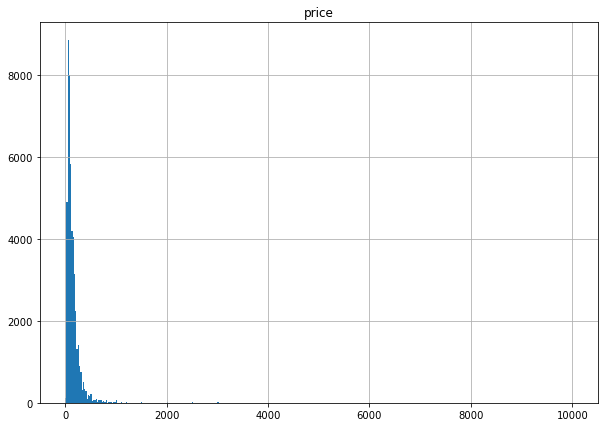

In [56]:
bin_count=400
nyc.hist(column='price',bins=bin_count,figsize=(10,7))


From the graph above, we can see that house prices ranges from 0 to approximately 2000. But noticeably most the prices seems to be around less than 1000. To get a much better estimate, lets use the **describe** method to check for outliers.

### Spread of 'price' data in terms of numbers:


The desctibe method gives an overall information (count, mean, std , max) about a dataset. Using this method will give us an estimate of the data spread of **price** column.  

In [57]:
nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Here, if we look closely on the **price** column, we can see the min, 25%, 50%, 75% and max value in that column. The price values ranges from 0 to 1000. the 75% value of column is 175. This means 75% of the value is within 0 -175. We can much closer to the max value and see the spread. We can do this by using the **quantile** method.  

In [58]:
nyc['price'].quantile(0.98)

550.0

We see that the 98%th value is 550 whereas the max value is 1000. So, we can see the actual spread of data is not wide as we observed in the histogram. So the data after the 98% can be removed as outliers. In this scenario, we can use the clipping method where we clip the data from the 98% meaning the data > 98% value will be replaced by  interpolation from that column.

## Removing the Outliers:

### Clipping the data within lower and upper range 

In [64]:
nyc['price']= nyc['price'].clip(nyc['price'].quantile(0.01), nyc['price'].quantile(0.98))

In [66]:
nyc['price'].max()

550.0

Notice that our max value has been replaced with values that was not there in the dataset.
This is because `quantile` has interpolated the values for us.

In [67]:
nyc['price'].min()

30.0

In [69]:
nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,140.490909,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,105.902317,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,30.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,550.000000,1250.000000,629.000000,58.500000,327.000000,365.000000
